# Perceptron

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # predicts True and False for these 2 flowers

In [3]:
y_pred

array([ True, False])

The Perceptron is equivalent to a SGDClassifier with loss="perceptron", no regularization, and a constant learning rate equal to 1:

In [4]:
# extra code – shows how to build and train a Perceptron

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="perceptron", penalty=None,
                        learning_rate="constant", eta0=1, random_state=42)
sgd_clf.fit(X, y)
assert (sgd_clf.coef_ == per_clf.coef_).all()
assert (sgd_clf.intercept_ == per_clf.intercept_).all()

When the Perceptron finds a decision boundary that properly separates the classes, it stops learning. This means that the decision boundary is often quite close to one class:

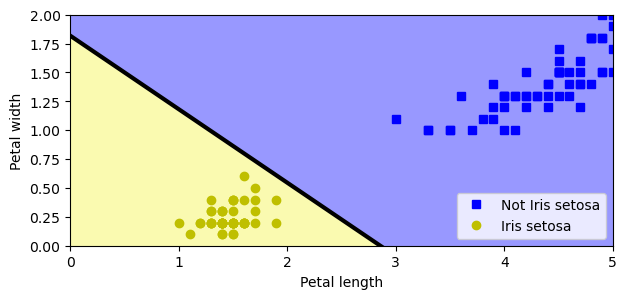

In [4]:
# extra code – plots the decision boundary of a Perceptron on the iris dataset

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize=(7, 3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-",
         linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="lower right")
plt.axis(axes)
plt.show()

# Regression MLPs

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [6]:
housing=fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [7]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

In [8]:
rmse

0.5053326657968666

Note that this MLP does not use any activation function for the output layer,
so it’s free to output any value it wants. This is generally fine, but if you want
to guarantee that the output will always be positive, then you should use the
ReLU activation function in the output layer, or the softplus activation
function, which is a smooth variant of ReLU:

# Classification MLPs


In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [10]:
iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)


In [11]:
mlp_class = MLPClassifier(hidden_layer_sizes=[5] , max_iter=10000 , random_state=42)
pipeline = make_pipeline(StandardScaler() ,  mlp_class )
pipeline.fit(X_train , y_train)
accuracy = pipeline.score(X_valid,y_valid)
accuracy

1.0

# Implementing MLPs with Keras
## Building an Image Classifier Using the Sequential API
### Using Keras to load the dataset
Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in tf.keras.datasets. The dataset is already split for you between a training set (60,000 images) and a test set (10,000 images), but it can be useful to split the training set further to have a validation set. We'll use 55,000 images for training, and 5,000 for validation.

In [2]:
import tensorflow as tf
import tensorflow.keras

In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [9]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_valid.shape)
print(y_valid.shape)

(60000, 28, 28)
(60000,)
(55000, 28, 28)
(55000,)
(10000, 28, 28)
(10000,)
(5000, 28, 28)
(5000,)


Each pixel intensity is represented as a byte (0 to 255):

In [15]:
X_train.dtype

dtype('uint8')

You can plot an image using Matplotlib's imshow() function, with a 'binary' color map:



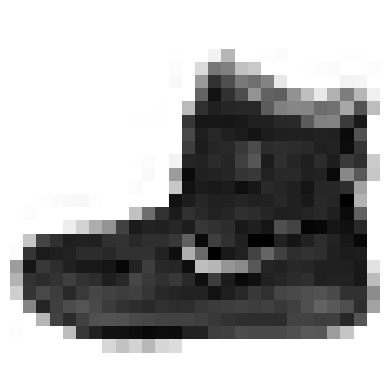

In [16]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()


## scaling
Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:

In [17]:
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.

With MNIST, when the label is equal to 5, it means that the image represents
the handwritten digit 5. Easy. For Fashion MNIST, however, we need the list
of class names to know what we are dealing with:

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [19]:
#the first image in the training set represents an ankle boot
print(y_train[0])
print(class_names[y_train[0]])

9
Ankle boot


## Creating the model using the sequential API

let’s build the neural network! Here is a classification MLP with two
hidden layers

In [20]:
# tf.random.set_seed(42)
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(300, activation="relu"))
# model.add(tf.keras.layers.Dense(100, activation="relu"))
# model.add(tf.keras.layers.Dense(10, activation="softmax"))

Instead of adding the layers one by one as we just did, it’s often more
convenient to pass a list of layers when creating the Sequential model. You
can also drop the Input layer and instead specify the input_shape in the first
layer:

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300 , activation="relu"),
    tf.keras.layers.Dense(100 ,activation="relu"),
    tf.keras.layers.Dense(10 , activation = "softmax")
    
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


im summary `none` means that layers can have any number of batch size

In [23]:
model.layers


In [35]:
hidden_layer_1 = model.layers[1]

In [36]:
hidden_layer_1.name

'dense'

In [37]:
weights , bias = hidden_layer_1.get_weights()

In [38]:
weights

array([[-0.03819492,  0.04083437, -0.02738503, ..., -0.01868929,
         0.00229038,  0.04801688],
       [ 0.04599984, -0.03665441,  0.0321371 , ...,  0.01762708,
         0.03160036, -0.06061314],
       [-0.04680805,  0.01641364, -0.01440486, ..., -0.04924339,
         0.00975346,  0.05991974],
       ...,
       [ 0.06802708, -0.06975766,  0.01914179, ..., -0.03562515,
         0.0655196 ,  0.03860344],
       [-0.0525287 ,  0.00515132,  0.03532483, ...,  0.02404125,
         0.02475537,  0.04783811],
       [ 0.02648395, -0.00237864,  0.02685829, ...,  0.00716381,
        -0.06331007,  0.0600742 ]], dtype=float32)

In [39]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [40]:
weights.shape

(784, 300)

In [42]:
bias.shape


(300,)

In [48]:
model.compile(loss="sparse_categorical_crossentropy" , optimizer="sgd" , metrics=["accuracy"])

In [49]:
# This is equivalent to:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [50]:
#how to convert class ids to one-hot vectors
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Note: it's important to set num_classes when the number of classes is greater than the maximum class id in the sample.

In [51]:
# shows how to convert one-hot vectors to class ids
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)

array([0, 5, 1, 0], dtype=int64)

# Training and evaluating the model


In [113]:
history = model.fit(X_train , y_train , epochs=30 , validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1350 - sparse_categorical_accuracy: 0.9521 - val_loss: 0.3279 - val_sparse_categorical_accuracy: 0.8922
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1318 - sparse_categorical_accuracy: 0.9541 - val_loss: 0.3196 - val_sparse_categorical_accuracy: 0.8912
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1292 - sparse_categorical_accuracy: 0.9550 - val_loss: 0.3731 - val_sparse_categorical_accuracy: 0.8842
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1279 - sparse_categorical_accuracy: 0.9545 - val_loss: 0.3291 - val_sparse_categorical_accuracy: 0.8912
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1269 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.3410 - val_sparse_categorical_accuracy: 0.8894
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1245 - spars

We pass it the input features (X_train) and the target classes (y_train), as well
as the number of epochs to train (or else it would default to just 1, which
would definitely not be enough to converge to a good solution). We also pass
a validation set (this is optional). Keras will measure the loss and the extra
metrics on this set at the end of each epoch, which is very useful to see how
well the model really performs. **If the performance on the training set is much
better than on the validation set, your model is probably overfitting the
training set, or there is a bug, such as a data mismatch between the training
set and the validation set.**

    The batch size is 32 by default, and since the training set has
    55,000 images, the model goes through 1,719 batches per epoch: 1,718 of
    size 32, and 1 of size 24

In [114]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [115]:
import pandas as pd
history_df=pd.DataFrame(history.history).join(pd.DataFrame(history.epoch , columns={"epocs":history.epoch})).set_index("epocs").rename_axis()

In [116]:
history_df

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
epocs,,,,
0,0.134988,0.952127,0.327862,0.8922
1,0.131814,0.954109,0.319578,0.8912
2,0.129226,0.955018,0.373134,0.8842
3,0.127913,0.954455,0.329055,0.8912
4,0.126908,0.955636,0.340987,0.8894
5,0.124515,0.956600,0.327432,0.8920
6,0.121411,0.957218,0.329182,0.8918
7,0.121015,0.957073,0.334866,0.8922
8,0.118090,0.958491,0.344999,0.8918


<Axes: xlabel='Epoch'>

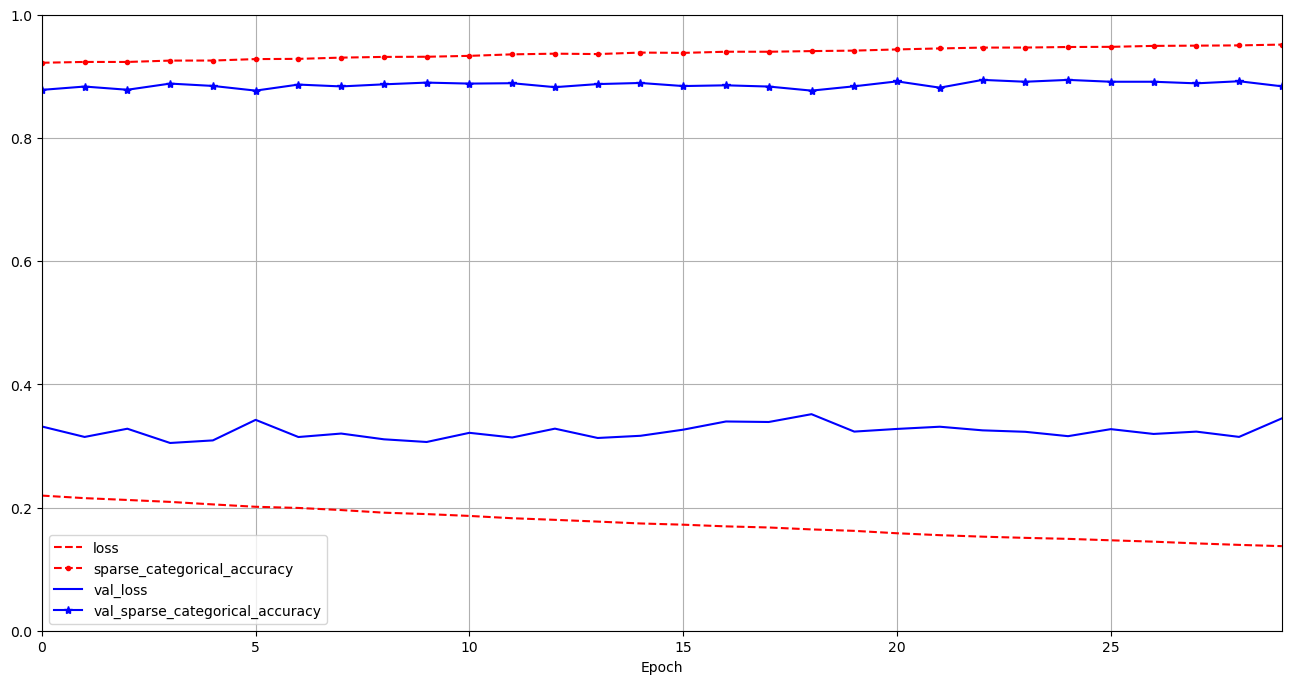

In [107]:
history_df.plot(figsize = (16,8) , xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch" , style=["r--", "r--.", "b-", "b-*"])

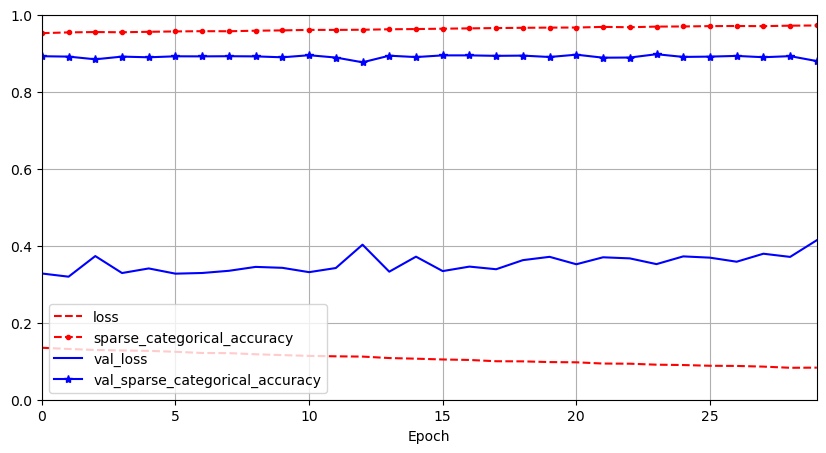

In [123]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(10, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
# save_fig("keras_learning_curves_plot")  # extra code
plt.show()


    the mean training loss and accuracy measured over each epoch, and
    the mean validation loss and accuracy measured at the end of each epoch

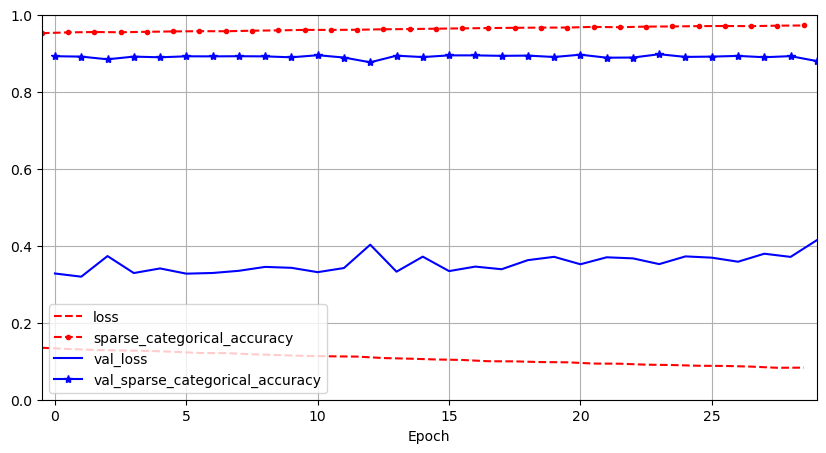

In [124]:
# shows how to shift the training curve by -1/2 epoch
plt.figure(figsize=(10, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

    -both the training accuracy and the validation accuracy
    steadily increase during training, 
    
    -while the training loss and the validation
    loss decrease. This is good. 
    
    -The validation curves are relatively close to each
    other at first, but they get further apart over time, which shows that there’s a
    little bit of overfitting. 
    
    -In this particular case, the model looks like it
    performed better on the validation set than on the training set at the beginning
    of training, but that’s not actually the case

**The validation error is computed
at the end of each epoch,**

**while the training error is computed using a running
mean during each epoch,**

so the training curve should be shifted by half an
epoch to the left. If you do that, you will see that the training and validation
curves overlap almost perfectly at the beginning of training.

# evaluate

Once you are satisfied with your model’s validation accuracy,
you should evaluate it on the test set to estimate the generalization error
before you deploy the model to production. You can easily do this using the
evaluate() method (it also supports several other arguments, such as
batch_size and sample_weight

In [125]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4256 - sparse_categorical_accuracy: 0.8805


[0.42560234665870667, 0.8805000185966492]

# prediction

In [156]:
X_new = X_test[:3]

In [157]:
y_proba = model.predict(X_new)
y_proba.round(2)


1/1 [==============================] - 0s 28ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

    For each instance the model estimates one probability per class, from class 0
    to class 9. This is similar to the output of the predict_proba() method in
    Scikit-Learn classifiers

In [148]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

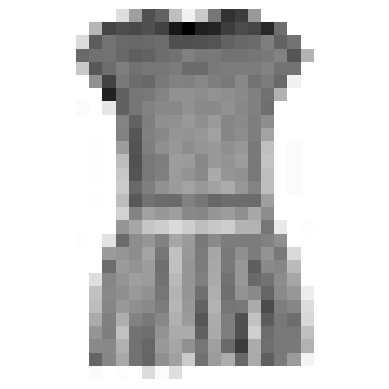

In [168]:
plt.imshow(X_train[3] , cmap = "binary" , )
plt.axis('off')
plt.show()

the class with the highest estimated probability (even if
that probability is quite low), then you can use the argmax() method to get the
highest probability class index for each instance:

In [161]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
y_pred


array([9, 2, 1], dtype=int64)

In [176]:
np.array(class_names)

array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
       'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], dtype='<U11')

In [177]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

**the classifier actually classified all three images correctly**

In [180]:
y_test[:3] # this is the actuall ans 

array([9, 2, 1], dtype=uint8)

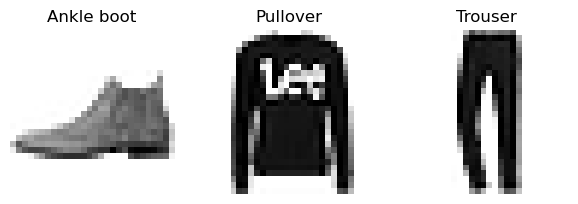

In [201]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
# save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# Building a Regression MLP Using the Sequential API

In [36]:
tf.random.set_seed(42)

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
housing = datasets.fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [82]:
norm_layer=tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model=tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50 , activation="relu"),
    tf.keras.layers.Dense(50 , activation="relu"),
    tf.keras.layers.Dense(50 , activation="relu"),
    tf.keras.layers.Dense(1)
    
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse" , optimizer=optimizer  , metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

In [83]:
history = model.fit(X_train , y_train , epochs=20 , validation_data=(X_valid , y_valid))

Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 0.7640 - root_mean_squared_error: 0.8741 - val_loss: 0.4245 - val_root_mean_squared_error: 0.6515
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3705 - root_mean_squared_error: 0.6087 - val_loss: 0.9931 - val_root_mean_squared_error: 0.9965
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3530 - root_mean_squared_error: 0.5941 - val_loss: 0.3552 - val_root_mean_squared_error: 0.5960
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3395 - root_mean_squared_error: 0.5827 - val_loss: 1.2028 - val_root_mean_squared_error: 1.0967
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3289 - root_mean_squared_error: 0.5735 - val_loss: 1.1548 - val_root_mean_squared_error: 1.0746
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3237 - root_mean_squared_error: 0.5690 - val_loss: 0.3612 - val_

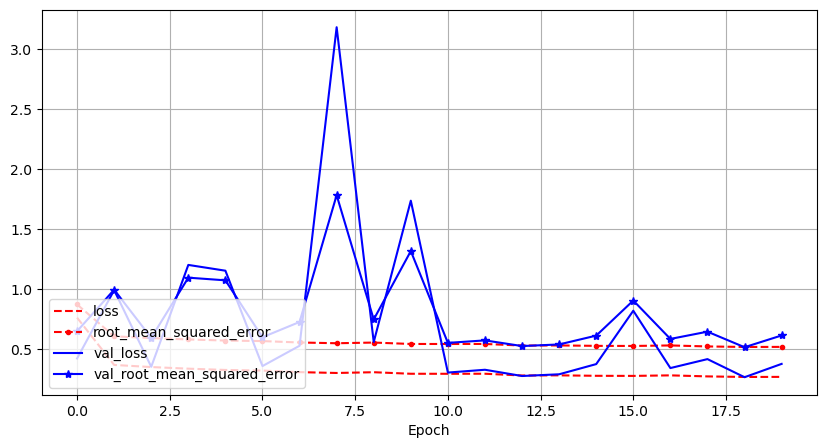

In [84]:
pd.DataFrame(history.history).plot(
    figsize=(10, 5), grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
# save_fig("keras_learning_curves_plot")  # extra code
plt.show()


In [14]:
mse_test, rmse_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.2859 - root_mean_squared_error: 0.5347


In [86]:
mse_test

0.27785933017730713

In [87]:
rmse_test

0.5271236300468445

In [88]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 68ms/step


In [89]:
y_pred

array([[0.5232341],
       [1.2091922],
       [5.003556 ]], dtype=float32)

In [90]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

# Building Complex Models Using the Functional API


Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see paper) connects all or part of the inputs directly to the output layer.


This architecture makes it possible
for the neural network to learn both deep patterns (using the deep path) and
simple rules (through the short path).⁠

In [4]:
#reset the name counters and make the code reproducible

tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [5]:
X_train.shape[1:]

(8,)

In [6]:

normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)


In [7]:
model = tf.keras.Model(inputs=[input_],outputs=[output])

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 normalization (Normalizati  (None, 8)                    17        ['input_1[0][0]']             
 on)                                                                                              
                                                                                                  
 dense (Dense)               (None, 30)                   270       ['normalization[0][0]']       
                                                                                                  
 dense_1 (Dense)             (None, 30)                   930       ['dense[0][0]']           

In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2787 - root_mean_squared_error: 0.5279 - val_loss: 0.4991 - val_root_mean_squared_error: 0.7064
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2768 - root_mean_squared_error: 0.5261 - val_loss: 0.6749 - val_root_mean_squared_error: 0.8215
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2819 - root_mean_squared_error: 0.5310 - val_loss: 0.3437 - val_root_mean_squared_error: 0.5863
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2736 - root_mean_squared_error: 0.5231 - val_loss: 0.4778 - val_root_mean_squared_error: 0.6912
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2754 - root_mean_squared_error: 0.5248 - val_loss: 0.5087 - val_root_mean_squared_error: 0.7132
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2733 - root_mean_squared_error: 0.5227 - val_loss: 1.0451 - val_

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).



In [17]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])


In [18]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2974 - root_mean_squared_error: 1.1391 - val_loss: 0.6279 - val_root_mean_squared_error: 0.7924
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4713 - root_mean_squared_error: 0.6865 - val_loss: 0.7307 - val_root_mean_squared_error: 0.8548
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4203 - root_mean_squared_error: 0.6483 - val_loss: 0.4237 - val_root_mean_squared_error: 0.6509
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4030 - root_mean_squared_error: 0.6348 - val_loss: 1.6988 - val_root_mean_squared_error: 1.3034
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3919 - root_mean_squared_error: 0.6260 - val_loss: 2.8683 - val_root_mean_squared_error: 1.6936
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4094 - root_mean_squared_error: 0.6398 - val_loss: 3.8140 - val_